In [19]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

import os
import sys
import re
import pandas as pd


sys.path.append('../src/')
import CONST
from _000_preprocess import _000_preprocess
from _000_preprocess import _001_preprocess
from _000_preprocess import _002_preprocess
trn_path, tst_path = _002_preprocess()
trn = pd.read_feather(trn_path)
tst = pd.read_feather(tst_path)
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 13 columns):
OffsetT24TotalTemperatureAtLpcOutletR      53759 non-null float64
OffsetT30TotalTemperatureAtHpcOutletR      53759 non-null float64
OffsetT50TotalTemperatureAtLptOutletR      53759 non-null float64
OffsetNcPhysicalCoreSpeedRpm               53759 non-null float64
OffsetPs30StaticPressureAtHpcOutletPsia    53759 non-null float64
OffsetNrcCorrectedCoreSpeedRpm             53759 non-null float64
OffsetBprBypassRatio                       53759 non-null float64
OffsetHtbleedBleedEnthalpy                 53759 non-null int64
OffsetW31HptCoolantBleedLbmS               53759 non-null float64
OffsetW32LptCoolantBleedLbmS               53759 non-null float64
Engine                                     53759 non-null object
FlightNo                                   53759 non-null int64
FlightRegime                               53759 non-null int64
dtypes: float64(9), int64(3), object(1)


In [10]:
feat_cols = [c for c in trn.columns if c not in CONST.EX_COLS]
feat_cols

['OffsetT24TotalTemperatureAtLpcOutletR',
 'OffsetT30TotalTemperatureAtHpcOutletR',
 'OffsetT50TotalTemperatureAtLptOutletR',
 'OffsetNcPhysicalCoreSpeedRpm',
 'OffsetPs30StaticPressureAtHpcOutletPsia',
 'OffsetNrcCorrectedCoreSpeedRpm',
 'OffsetBprBypassRatio',
 'OffsetHtbleedBleedEnthalpy',
 'OffsetW31HptCoolantBleedLbmS',
 'OffsetW32LptCoolantBleedLbmS',
 'FlightNo',
 'FlightRegime']

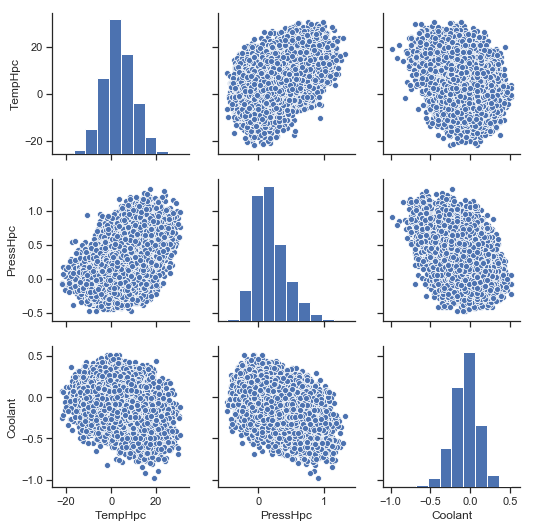

In [14]:
sns.pairplot(
    trn[['OffsetT30TotalTemperatureAtHpcOutletR', 'OffsetPs30StaticPressureAtHpcOutletPsia',  'OffsetW31HptCoolantBleedLbmS']].rename(
    columns={
        'OffsetT30TotalTemperatureAtHpcOutletR': 'TempHpc',
        'OffsetPs30StaticPressureAtHpcOutletPsia': 'PressHpc',
        'OffsetW31HptCoolantBleedLbmS': 'Coolant'
    })
)

In [15]:
trn['OffsetFeatureMultiplied'] = 1
for c in [c for c in trn.columns if 'Offset' in c]:
    trn['OffsetFeatureMultiplied'] *= trn[c]

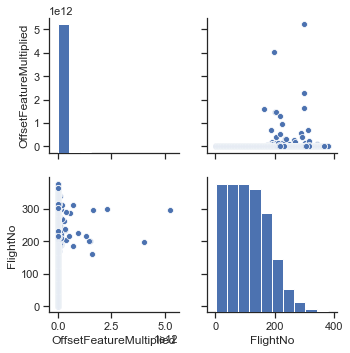

In [16]:
sns.pairplot(trn[['OffsetFeatureMultiplied', 'FlightNo']])

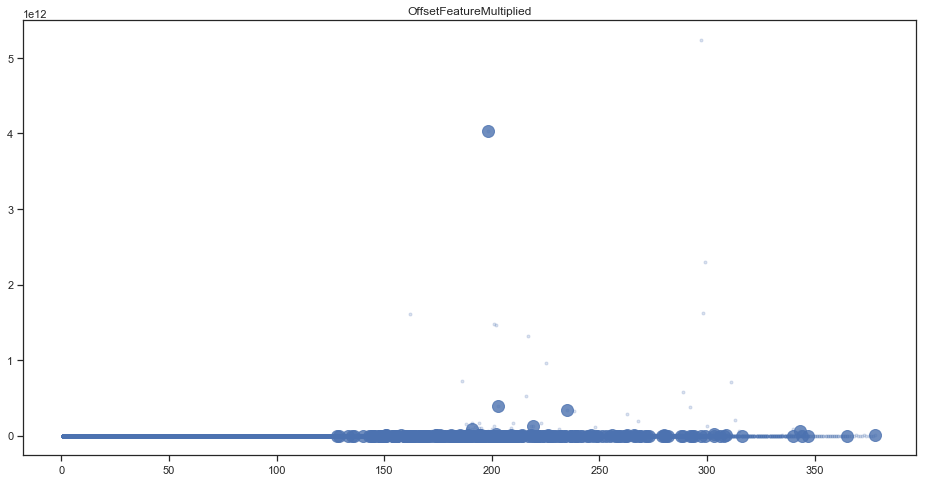

In [17]:
cp = sns.color_palette(n_colors=6)
# 数値データに関して時系列プロットを行う, Regimeで色分け
plt.figure(figsize=(16, 8))
plt.title(c)
for e, g in trn.groupby('Engine'):
    plt.plot(g['FlightNo'], g['OffsetFeatureMultiplied'], '.', c=cp[0], alpha=.2)
    last = g[g.FlightNo == g.FlightNo.max()]
    plt.plot(last['FlightNo'], last['OffsetFeatureMultiplied'], 'o', markersize=12, c=cp[0], alpha=.8)
# plt.plot(tst['FlightNo'], tst['OffsetFeatureMultiplied'], '.', c=cp[2], alpha=.5)
plt.show()

オフセットしたやつ掛け合わせても0にオフセットしているからあんまりナンセンスな気がしてきた．

In [20]:
trn_path, tst_path = _001_preprocess()

In [21]:
trn = pd.read_feather(trn_path)
tst = pd.read_feather(tst_path)

/anaconda3/envs/phmc_mac/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [22]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 19 columns):
FlightRegime                            53759 non-null int64
T24TotalTemperatureAtLpcOutletR         53759 non-null float64
T30TotalTemperatureAtHpcOutletR         53759 non-null float64
T50TotalTemperatureAtLptOutletR         53759 non-null float64
P30TotalPressureAtHpcOutletPsia         53759 non-null float64
NfPhysicalFanSpeedRpm                   53759 non-null float64
NcPhysicalCoreSpeedRpm                  53759 non-null float64
EprEnginePressureRatioP50P2             53759 non-null float64
Ps30StaticPressureAtHpcOutletPsia       53759 non-null float64
PhiRatioOfFuelFlowToPs30PpsPsi          53759 non-null float64
NrfCorrectedFanSpeedRpm                 53759 non-null float64
NrcCorrectedCoreSpeedRpm                53759 non-null float64
BprBypassRatio                          53759 non-null float64
HtbleedBleedEnthalpy                    53759 non-null int64
PcnfrDmdDeman

In [31]:
# OffsetT24TotalTemperatureAtLpcOutletR      53759 non-null float64
# OffsetT30TotalTemperatureAtHpcOutletR      53759 non-null float64
# OffsetT50TotalTemperatureAtLptOutletR      53759 non-null float64
# OffsetNcPhysicalCoreSpeedRpm               53759 non-null float64
# OffsetPs30StaticPressureAtHpcOutletPsia    53759 non-null float64
# OffsetNrcCorrectedCoreSpeedRpm             53759 non-null float64
# OffsetBprBypassRatio                       53759 non-null float64
# OffsetHtbleedBleedEnthalpy                 53759 non-null int64
# OffsetW31HptCoolantBleedLbmS               53759 non-null float64
# OffsetW32LptCoolantBleedLbmS
multiply_features = ['T24TotalTemperatureAtLpcOutletR', 'T30TotalTemperatureAtHpcOutletR', 'T50TotalTemperatureAtLptOutletR',
                    'NcPhysicalCoreSpeedRpm', 'Ps30StaticPressureAtHpcOutletPsia', 'Ps30StaticPressureAtHpcOutletPsia',
                    'NrcCorrectedCoreSpeedRpm', 'BprBypassRatio', 'HtbleedBleedEnthalpy', 'W31HptCoolantBleedLbmS', 'W32LptCoolantBleedLbmS']
trn['MultipliedFeature'] = 1
tst['MultipliedFeature'] = 1
for c in multiply_features:
    trn['MultipliedFeature'] *= trn[c]
    tst['MultipliedFeature'] *= tst[c]

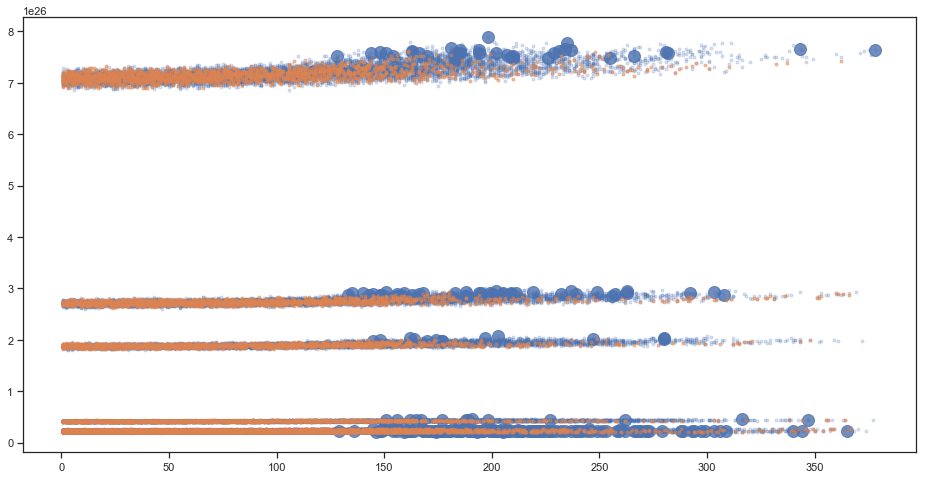

In [32]:
cp = sns.color_palette(n_colors=6)
# 数値データに関して時系列プロットを行う, Regimeで色分け
plt.figure(figsize=(16, 8))
for e, g in trn.groupby('Engine'):
    plt.plot(g['FlightNo'], g['MultipliedFeature'], '.', c=cp[0], alpha=.2)
    last = g[g.FlightNo == g.FlightNo.max()]
    plt.plot(last['FlightNo'], last['MultipliedFeature'], 'o', markersize=12, c=cp[0], alpha=.8)
plt.plot(tst['FlightNo'], tst['MultipliedFeature'], '.', c=cp[1], alpha=.5)
plt.show()

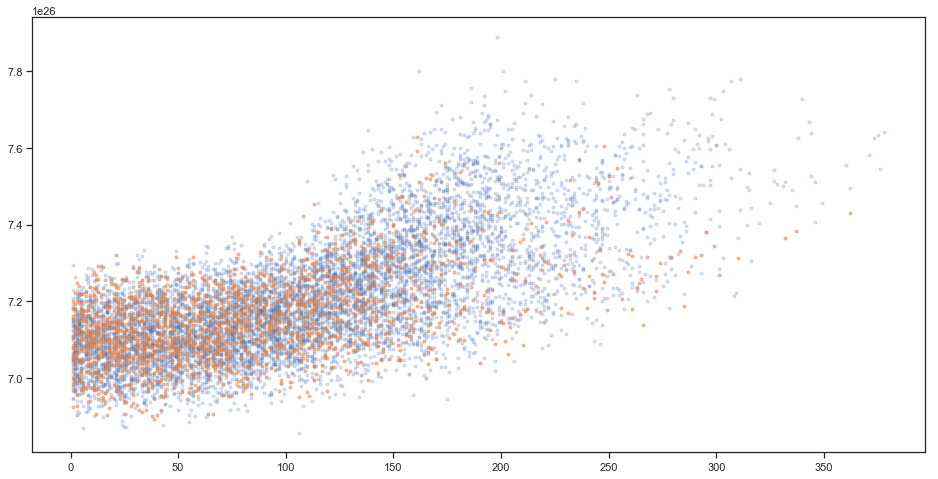

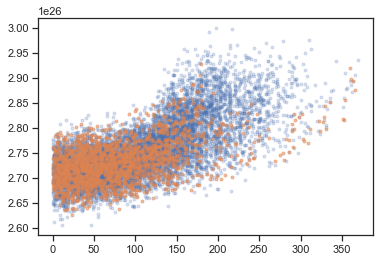

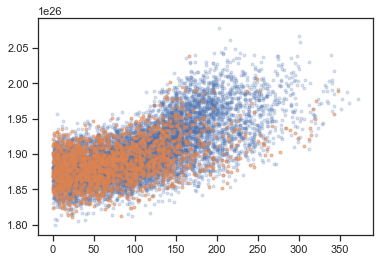

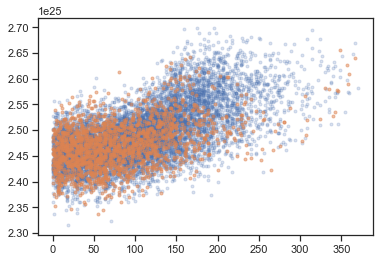

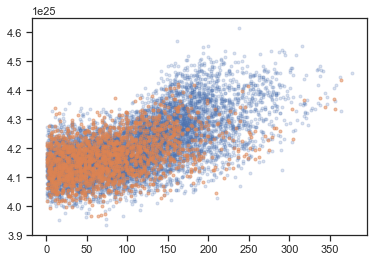

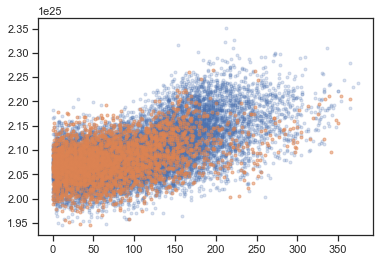

In [33]:
# 数値データに関して時系列プロットを行う, Regimeで色分け
plt.figure(figsize=(16, 8))
for r in [1, 2, 3, 4, 5, 6]:
    for e, g in trn.groupby('Engine'):
        plt.plot(g[g.FlightRegime==r]['FlightNo'], g[g.FlightRegime==r]['MultipliedFeature'], '.', c=cp[0], alpha=.2)   
    plt.plot(tst[tst.FlightRegime==r]['FlightNo'], tst[tst.FlightRegime==r]['MultipliedFeature'], '.', c=cp[1], alpha=.5)
    plt.show()